In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer

In [35]:
df = pd.read_csv("./agaricus_lepiota_dataset/agaricus_lepiota_small_c.csv")

In [36]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,s,y,t,a,f,w,b,g,...,s,w,w,p,w,o,p,n,v,d
1,e,f,s,y,f,n,f,c,b,p,...,s,w,w,p,w,o,f,n,y,g
2,e,k,s,w,f,c,f,w,b,g,...,s,w,n,p,w,t,e,w,n,g
3,e,f,f,n,t,n,f,c,b,w,...,s,g,w,p,w,o,p,k,v,d
4,p,x,s,w,t,p,f,c,n,w,...,s,w,w,p,w,o,p,n,s,u


## Codificando o atributo de saída (class) para:
### e → 0, p → 1

In [37]:
df["class"] = df["class"].replace("p", "1")
df["class"] = df["class"].replace("e", "0")

In [38]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,x,s,y,t,a,f,w,b,g,...,s,w,w,p,w,o,p,n,v,d
1,0,f,s,y,f,n,f,c,b,p,...,s,w,w,p,w,o,f,n,y,g
2,0,k,s,w,f,c,f,w,b,g,...,s,w,n,p,w,t,e,w,n,g
3,0,f,f,n,t,n,f,c,b,w,...,s,g,w,p,w,o,p,k,v,d
4,1,x,s,w,t,p,f,c,n,w,...,s,w,w,p,w,o,p,n,s,u


<Axes: xlabel='stalk-root', ylabel='Count'>

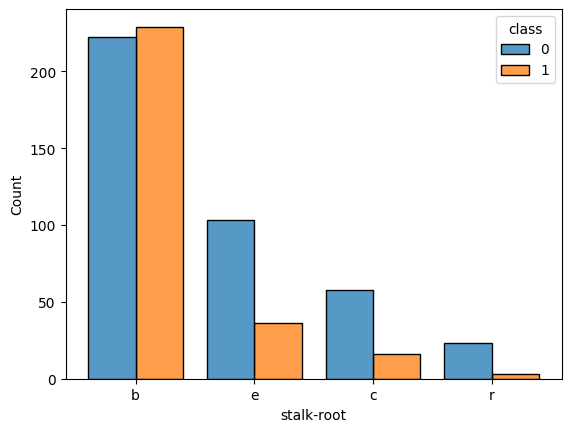

In [39]:
 sns.histplot(data=df, bins=10, x='stalk-root', hue='class', multiple='dodge', shrink=0.8)

## A coluna stalk-root tem atributos faltantes, porém que seus dados podem ser úteis visto que há uma variedade de amostras, então não decidimos excluir a coluna, e sim fazer a  exclusão das instâncias com valores faltantes.

In [40]:
df.isnull().sum().sum() #quantidade de dados faltantes

310

In [42]:
df.dropna(inplace=True)

y = df[['class']].values.ravel()
X = df.drop('class', axis=1)

df.isnull().sum().sum() #quantidade de dados faltantes após a imputação

0

## Codificação dos atributos categóricos

### Com a análise das caracteristicas, decidimos codificar as classes:
- ring-number (pode ser codificado por ser um valor ordinal)
- population (pode ser codificado por ser um valor ordinal)
- stalk-shape (valor categórico significativo, pode ser codificado com OneHotEncoder)
- gill-size (valor categórico significativo, pode ser codificado com OneHotEncoder)